In [145]:
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

#Set Display options
pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns', 20)

In [146]:
data_orig = pd.read_csv(r"./data/player_past_history/merged_data.csv" , parse_dates = ["kickoff_time"]) 
data_orig.columns


Index(['fixture_id', 'opponent_team_id', 'total_points', 'was_home',
       'kickoff_time', 'team_h_score', 'team_a_score', 'gameweek_id',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'player_price', 'transfers_balance', 'selected',
       'transfers_in', 'transfers_out', 'opponent_team_id.1',
       'opponent_strength', 'opponent_team_name', 'player_id', 'web_name',
       'position_id', 'player_price.1', 'team_id', 'team_name'],
      dtype='object')

In [147]:
data_orig.team_name.unique()

array(['ARS', 'BUR', 'TOT', 'WOL', 'CHE', 'NEW', 'SHU', 'MUN', 'SOU',
       'WHU', 'AVL', 'EVE', 'WAT', 'BHA', 'BOU', 'NOR', 'CRY', 'LIV',
       'MCI', 'LEI'], dtype=object)

In [148]:
teams_in_data = ["ARS", "BUR" , "TOT" , "WOL" , "CHE" , "SHU" , "MUN" , "SOU" , "CRY" , "LIV" , "MCI" , "LEI"]
#data = data_orig[data_orig.team_name.isin(teams_in_data)]

data = data[["player_id" , "web_name" , "player_price" ,'was_home' , "position_id", "total_points" , "minutes"  , "opponent_team_id" , "opponent_strength" , "team_id" , "kickoff_time"]]

# The day of the week with Monday=0, Sunday=6.
data["kickoff_day"] = pd.DatetimeIndex(data["kickoff_time"]).weekday

# The hours of the datetime.
data["kickoff_hour"] = pd.DatetimeIndex(data["kickoff_time"]).hour


data = data[data.minutes != 0]
#data = data[data.total_points <= 15]
#data = data[data.total_points > 3]
data

,player_id,web_name,player_price,was_home,position_id,total_points,minutes,opponent_team_id,opponent_strength,team_id,kickoff_time,kickoff_day,kickoff_hour
1,97,McNeil,$0.24,True,3,3,$0.92,16,3,5,2019-08-10 14:00:00,5,14
2,345,Lucas Moura,$0.41,True,3,5,$1.00,2,2,17,2019-08-10 16:30:00,5,16
4,346,Lamela,$0.24,True,3,1,$0.97,2,2,17,2019-08-10 16:30:00,5,16
6,93,Pope,$0.08,True,1,8,$1.00,16,3,5,2019-08-10 14:00:00,5,14
7,347,Winks,$0.19,True,3,2,$0.69,2,2,17,2019-08-10 16:30:00,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22465,321,Ward-Prowse,$0.21,True,3,2,$1.00,15,3,16,2020-07-26 15:00:00,6,15
22476,172,Barnes,$0.22,True,3,1,$0.15,12,4,9,2020-07-26 15:00:00,6,15
22480,469,Ceballos,$0.16,True,3,2,$0.78,18,3,1,2020-07-26 15:00:00,6,15
22482,411,Patrício,$0.17,False,1,1,$1.00,6,4,20,2020-07-26 15:00:00,6,15


In [149]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Normalize the numeric columns
data[['minutes' , 'player_price']] = scaler.fit_transform(data[['minutes' , 'player_price']])
data.head()

,player_id,web_name,player_price,was_home,position_id,total_points,minutes,opponent_team_id,opponent_strength,team_id,kickoff_time,kickoff_day,kickoff_hour
1,97,McNeil,$0.24,True,3,3,$0.92,16,3,5,2019-08-10 14:00:00,5,14
2,345,Lucas Moura,$0.41,True,3,5,$1.00,2,2,17,2019-08-10 16:30:00,5,16
4,346,Lamela,$0.24,True,3,1,$0.96,2,2,17,2019-08-10 16:30:00,5,16
6,93,Pope,$0.08,True,1,8,$1.00,16,3,5,2019-08-10 14:00:00,5,14
7,347,Winks,$0.19,True,3,2,$0.68,2,2,17,2019-08-10 16:30:00,5,16


In [150]:
numeric_features = ['minutes' , 'player_price']

data[numeric_features + ['total_points']].describe()

,minutes,player_price,total_points
count,"$6,121.00","$6,121.00","$6,121.00"
mean,$0.80,$0.23,$3.26
std,$0.32,$0.18,$3.18
min,$0.00,$0.00,$-6.00
25%,$0.71,$0.12,$1.00
50%,$1.00,$0.17,$2.00
75%,$1.00,$0.26,$5.00
max,$1.00,$1.00,$24.00


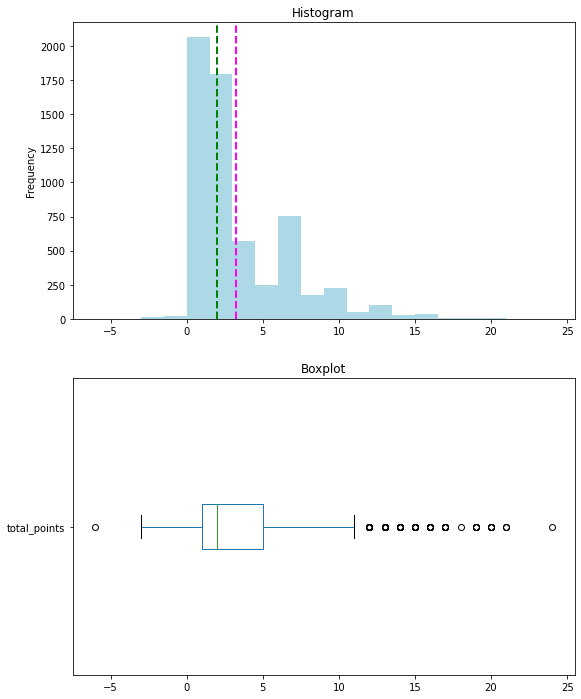

In [151]:
# Get the label column
label = data['total_points']

# Create a figure for multiple subplots
fig = plt.figure(figsize=(9,12))

# Plot a histogram
a= fig.add_subplot(2, 1, 1)
label.plot.hist(color='lightblue', bins=20)

# Show the mean and median values on the plot
plt.axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(label.median(), color='green', linestyle='dashed', linewidth=2)
a.set_title('Histogram')

# Plot a Boxplot
a=fig.add_subplot(2, 1, 2)
# create a horizontal box plot somit lines up with the histogram for comparison
label.plot(kind='box', vert=False)
a.set_title('Boxplot')

# Show the plot
plt.show()

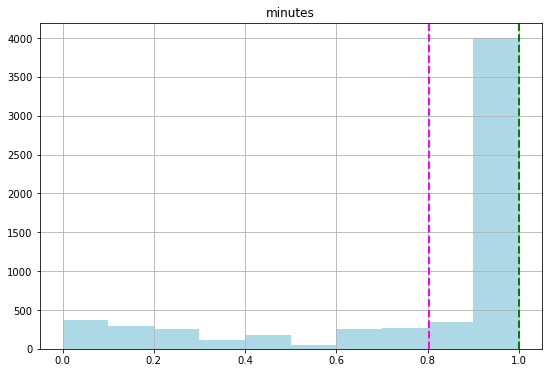

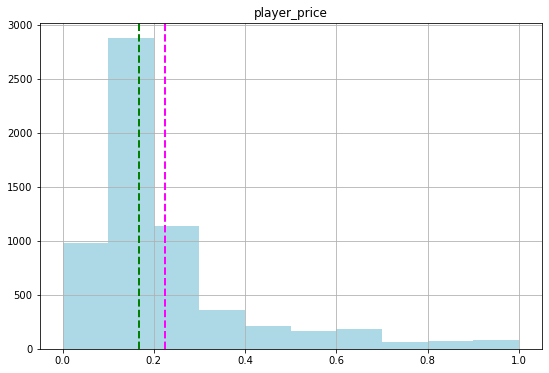

In [152]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(color='lightblue', bins=10, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [153]:
data.head()

,player_id,web_name,player_price,was_home,position_id,total_points,minutes,opponent_team_id,opponent_strength,team_id,kickoff_time,kickoff_day,kickoff_hour
1,97,McNeil,$0.24,True,3,3,$0.92,16,3,5,2019-08-10 14:00:00,5,14
2,345,Lucas Moura,$0.41,True,3,5,$1.00,2,2,17,2019-08-10 16:30:00,5,16
4,346,Lamela,$0.24,True,3,1,$0.96,2,2,17,2019-08-10 16:30:00,5,16
6,93,Pope,$0.08,True,1,8,$1.00,16,3,5,2019-08-10 14:00:00,5,14
7,347,Winks,$0.19,True,3,2,$0.68,2,2,17,2019-08-10 16:30:00,5,16


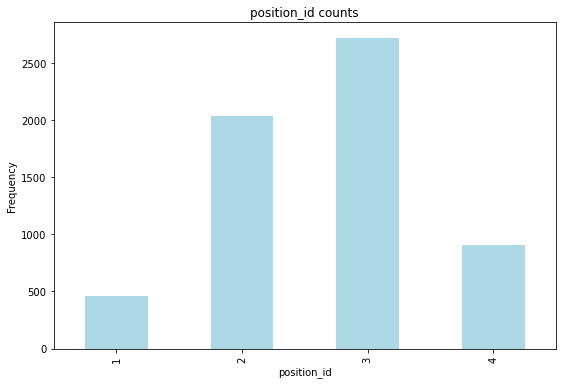

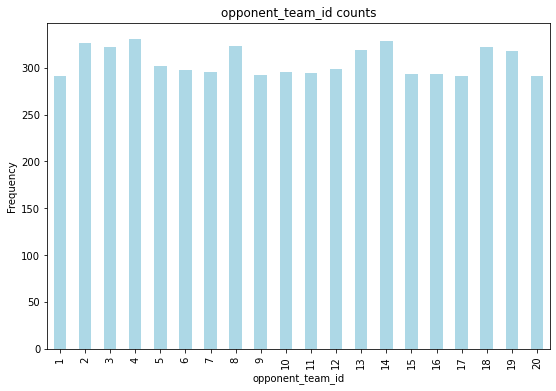

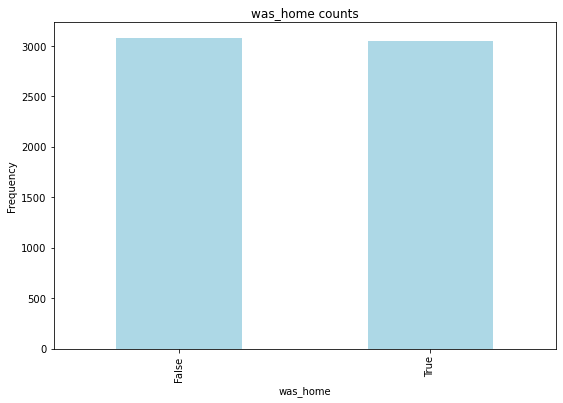

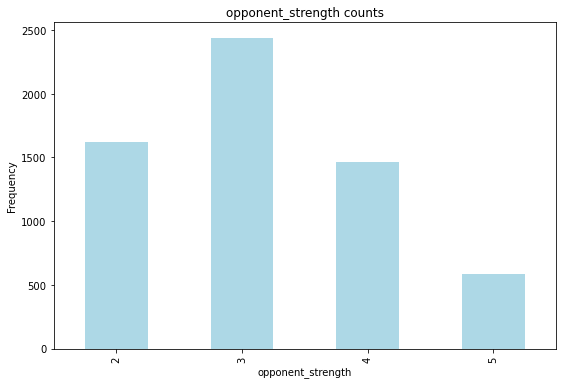

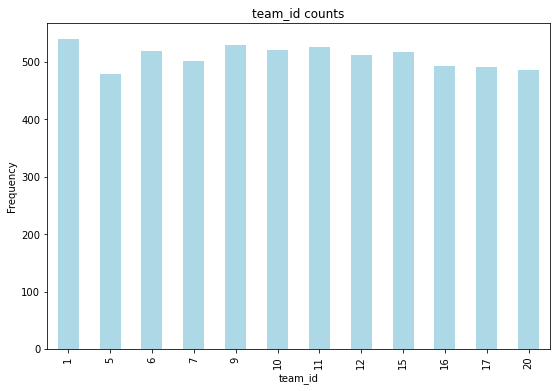

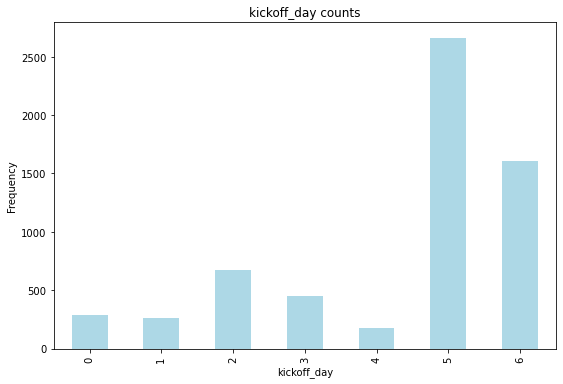

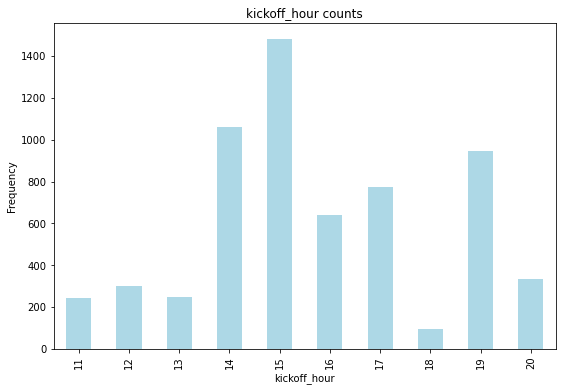

In [154]:
# plot a bar plot for each categorical feature count
categorical_features = ['position_id' , 'opponent_team_id' , 'was_home' , 'opponent_strength' , 'team_id' , 'kickoff_day' , 'kickoff_hour']

for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='lightblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


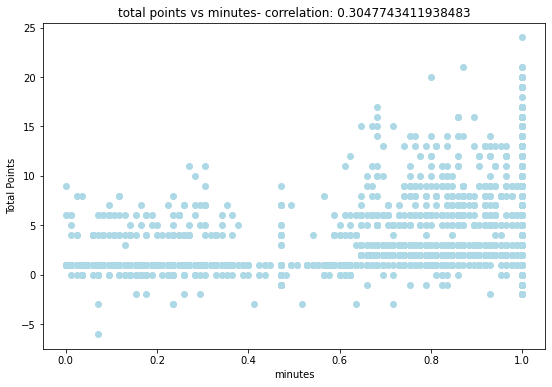

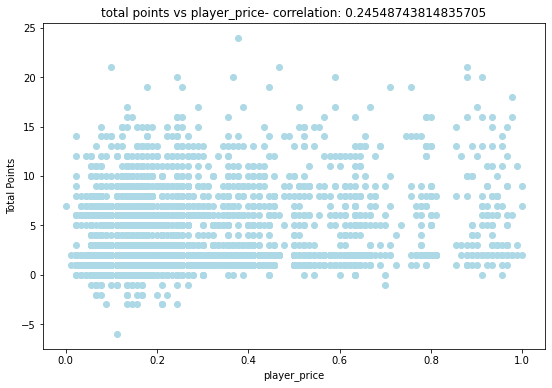

In [155]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['total_points']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, color='lightblue')
    plt.xlabel(col)
    plt.ylabel('Total Points')
    ax.set_title('total points vs ' + col + '- correlation: ' + str(correlation))
plt.show()


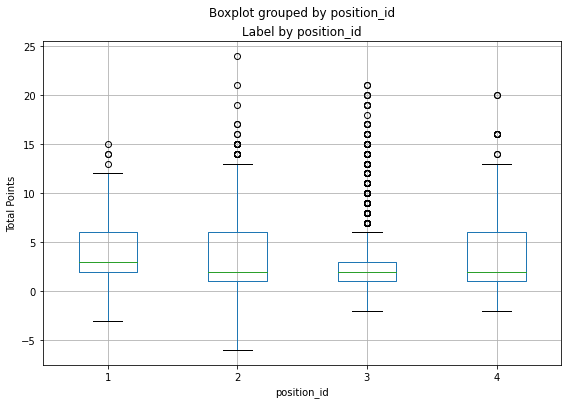

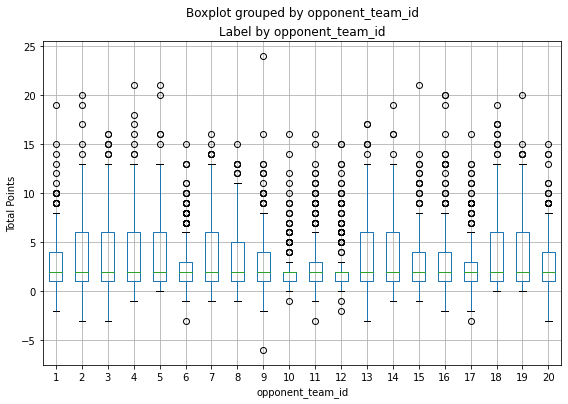

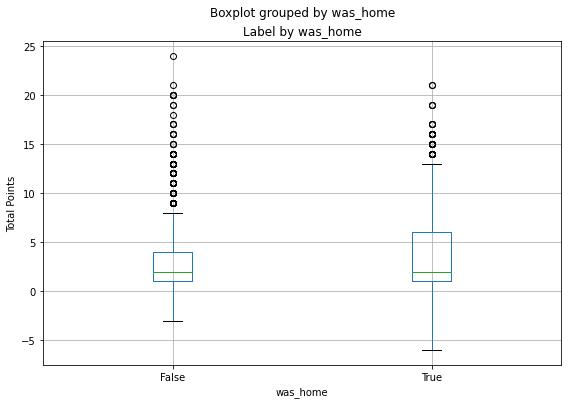

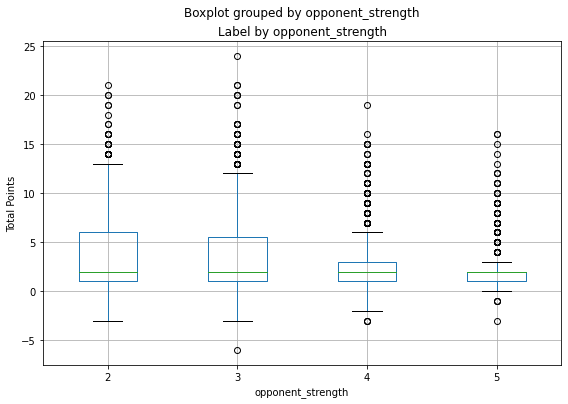

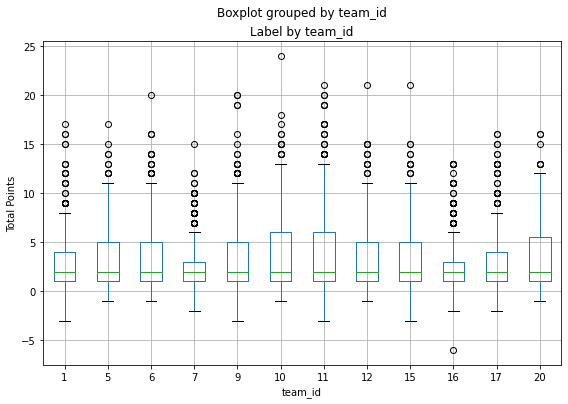

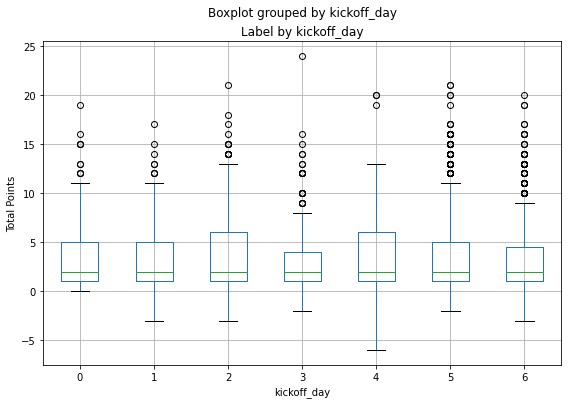

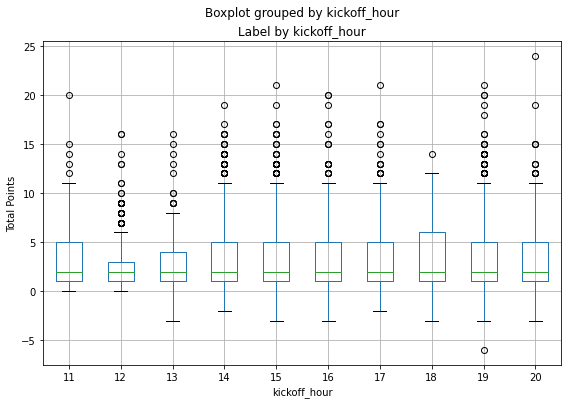

In [156]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'total_points', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Total Points")
plt.show()

In [157]:
# Separate features and labels
X, y = data[['position_id' , 'opponent_team_id' , 'was_home', 'opponent_strength' , 'team_id' , 'kickoff_hour' , 'player_price' , 'minutes']].values, data['total_points'].values
np.set_printoptions(edgeitems=10)
np.core.arrayprint._line_width = 1000
np.set_printoptions(suppress=True)
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[3 16 True 3 5 14 0.24444444444444452 0.9176470588235296]
 [3 2 True 2 17 16 0.41111111111111115 1.0]
 [3 2 True 2 17 16 0.24444444444444452 0.9647058823529413]
 [1 16 True 3 5 14 0.07777777777777778 1.0]
 [3 2 True 2 17 16 0.18888888888888894 0.6823529411764707]
 [4 16 True 3 5 14 0.3 1.0]
 [3 2 True 2 17 16 0.13333333333333336 1.0]
 [4 16 True 3 5 14 0.3 0.9176470588235296]
 [2 2 True 2 17 16 0.18888888888888894 1.0]
 [4 2 True 2 17 16 0.8 1.0]]

Labels:
[ 3  5  1  8  2  2  5 13  2 13]


In [158]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.size, X_test.size))

Training Set: 34272, rows
Test Set: 14696 rows


In [159]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression(normalize=False).fit(X_train, y_train)
print (model)

LinearRegression()


In [160]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [7. 4. 5. 1. 1. 3. 0. 4. 4. 4.]
Actual labels   :  [21 20  1  1  6  2  1  1  2  6]


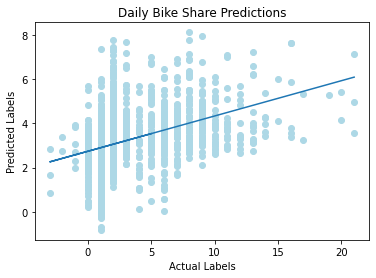

In [161]:
plt.scatter(y_test, predictions, color="lightblue")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()

In [162]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 8.719767804142158
RMSE: 2.952925296065269
R2: 0.14399713169886497


In [163]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression(normalize=False))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', LinearRegression())])


Predicted labels:  [7. 4. 5. 1. 1. 4. 0. 4. 3. 5.]
Actual labels:  [21 20  1  1  6  2  1  1  2  6]
MSE: 8.727051442132423
RMSE: 2.954158330579528
R2: 0.14328211093783383


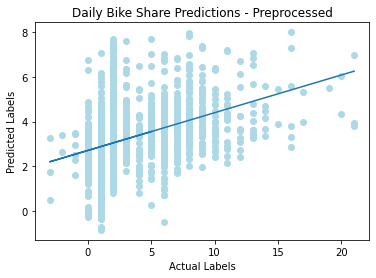

In [164]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels: ' ,y_test[:10])

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions, color='lightblue')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()

In [165]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', GradientBoostingRegressor())])


# train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 8.403463557473634
RMSE: 2.8988728080882806
R2: 0.17504811246872765


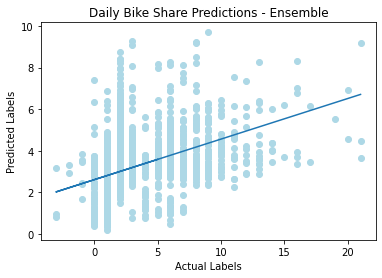

In [166]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions, color='lightblue')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Ensemble')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()